### NOAA Met and Ocean Data Analysis 2014-2017 for Oregon Inlet and the USACoE FRF, NC

#### Source Data for Analysis - Met and Ocean [meta]data from NOAA's National Data Bouy Center


** The Data (Who):** Recent historic wave data taken from U.S. Army Corps of Engineers station 44056, located at: 36.2 N and 75.714 W (adjacent to the Corps' Field Research Facility (FRF) in Duck, NC.)  

** The Data (What):** Historic archives for the years 2014, 2015, 2016, and for partial 2017 (Jan-August, inclusive). The latter will be merged to create a single 2017 wave record data set later in this notebook.

**The Data (Where):** http://www.ndbc.noaa.gov

** The Data (How):** Waverider bouy  (located offshore of FRF, in approx. 17 m of water)


**General**

**Units:** Station pages display the current hour's measurements in English units by default, but can be changed by the viewer to metric units. When accessing Real Time and Historical data files, the measurements are generally in metric units, as described below, and cannot be changed.

**Time:** Station pages show current observations in station local time by default, but can be changed by the viewer to UTC (formerly GMT). Both Realtime and Historical files show times in UTC only. See the Acquisition Time help topic for a more detailed description of observation times. For more information on the times in the files, see the changes page at http://www.ndbc.noaa.gov/mods.shtml.

**Station ID:** Five-digit WMO Station Identifier, used since 1976. ID's can be reassigned to future deployments within the same 1 degree square.

**Formats:** Data are classified according to the following groups. The header lines are shown at the beginning of group. Note that in the Realtime files, non-data lines begin with "#". Such lines should be treated as comment lines.

**Meteorological/Oceanographic Data Header**

#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS PTDY  TIDE
#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC  nmi  hPa    ft
2014 09 11 16 50 120  5.0  6.0   0.6     6   4.2 134 1016.5  29.3  30.5  24.4   MM +0.3    MM

WDIR	Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD. See Wind Averaging Methods

WSPD	Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly. See Wind Averaging Methods.

GST	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period. The 5 or 8 second period can be determined by payload, See the Sensor Reporting, Sampling, and Accuracy section.

WVHT	Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period. See the Wave Measurements section.

DPD	Dominant wave period (seconds) is the period with the maximum wave energy. See the Wave Measurements section.

APD	Average wave period (seconds) of all waves during the 20-minute period. See the Wave Measurements section.

MWD	The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees. See the Wave Measurements section.

PRES	Sea level pressure (hPa). For C-MAN sites and Great Lakes buoys, the recorded pressure is reduced to sea level using the method described in NWS Technical Procedures Bulletin 291 (11/14/80). ( labeled BAR in Historical files)

ATMP	Air temperature (Celsius). For sensor heights on buoys, see Hull Descriptions. For sensor heights at C-MAN stations, see C-MAN Sensor Locations

WTMP	Sea surface temperature (Celsius). For buoys the depth is referenced to the hull's waterline. For fixed platforms it varies with tide, but is referenced to, or near Mean Lower Low Water (MLLW).

DEWP	Dewpoint temperature taken at the same height as the air temperature measurement.

VIS	Station visibility (nautical miles). Note that buoy stations are limited to reports from 0 to 1.6 nmi.

PTDY	Pressure Tendency is the direction (plus or minus) and the amount of pressure change (hPa)for a three hour period ending at the time of observation. (not in Historical files)

TIDE	The water level in feet above or below Mean Lower Low Water (MLLW).
***************

**Notes:**
- Data missing for period spanning 12-04-2016 to 12-29-2016


**References:**
- Info on reading a fixed format text file in pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_fwf.html

- Chris Albon's page on joining, concatenating, and merging dataframes (good stuff): https://chrisalbon.com/python/pandas_join_merge_dataframe.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

%matplotlib inline
sns.set()   # use Seaborn plot style by default thru-out notebook

In [7]:
### Load up the wave data from sources:
### Files prefixed with 44056 are from the USACoE FRF waverider bouy
### Files prefixed with 44095 from the UNC CSI waverider bouy

### 44095 Header Unites: #yr  mo dy hr mn degT m/s  m/s     m   sec   sec deg    hPa  degC  degC  degC  nmi    ft

fp='/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/data/OceanWaveData/'
f2014='44095h2014.txt'      # note that this file, and its companions, are fixed width format, space-delimited text...
f2015='44056h2015.txt'
f2016='44056h2016.txt'
### monthly records for 2017...
f201701='4405612017.txt'
f201702='4405622017.txt'
f201703='4405632017.txt'
f201704='4405642017.txt'
f201705='4405652017.txt'
f201706='4409562017.txt'
f201707='4409572017.txt'
f201708='4405682017.txt'

### Note that in order to create a Python datetime object from the discrete data and time fields supplied from the 
### source we must name these fields as: year, month, day, hour, minute and second, respectively: (minimal columns 
### are year, month and day)

cols=['year','month','day','hour','minute','WDIR','WSPD','GST','WVHT','DPD','APD','MWD','PRES','ATMP','WTMP','DEWP','VIS','TIDE']

df2014=pd.read_fwf(fp+f2014, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df2015=pd.read_fwf(fp+f2015, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df2016=pd.read_fwf(fp+f2016, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201701=pd.read_fwf(fp+f201701, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201702=pd.read_fwf(fp+f201702, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201703=pd.read_fwf(fp+f201703, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201704=pd.read_fwf(fp+f201704, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201705=pd.read_fwf(fp+f201705, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201706=pd.read_fwf(fp+f201706, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201707=pd.read_fwf(fp+f201707, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)
df201708=pd.read_fwf(fp+f201708, colspecs='infer', header=1, skiprows=1, delim_whitespace=True, names=cols)

In [8]:
### Join the two single monthdata frames for 2017 (201704 and 201708) into a single 2017 df:
df2017 = pd.concat([df201701,df201702,df201703,df201704,df201705, df201706,df201707, df201708])
#
#df2017

#### Pivot Tables and Plots...

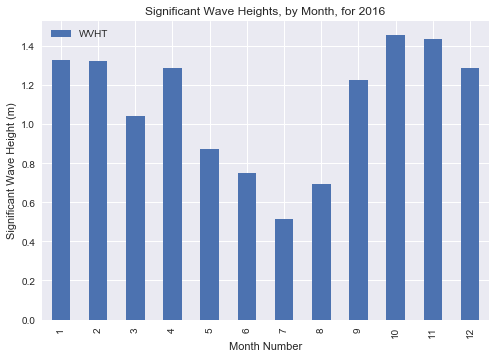

In [9]:
pd.pivot_table(df2016, index='month', values='WVHT').plot(kind='Bar')
plt.xlabel('Month Number')
plt.ylabel('Significant Wave Height (m)')
plt.title('Significant Wave Heights, by Month, for 2016')

### Single Year Significant Wave Height Statistics (Daily Averaged):

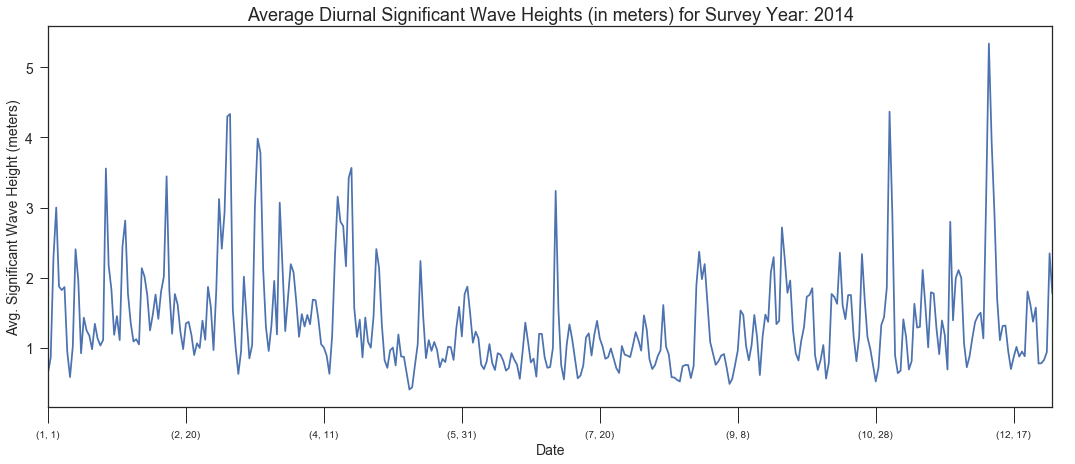

In [56]:
### Plot annual wave height statistics for each survey year:

surveys=['df2014','df2015','df2016','df2017']

pd.pivot_table(df2014, index=['month','day'], values=['WVHT']).plot(kind='Line', figsize=(18,7), legend=False)
loc,tic=plt.xticks()    # get the default x tic locations and labels
#xtics=['Jan 1']

plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg. Significant Wave Height (meters)', fontsize=14)
plt.title('Average Diurnal Significant Wave Heights (in meters) for Survey Year: 2014', fontsize=18)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/SignificantWaveHeights_2014.pdf')

In [41]:
for survey in surveys:
    print('df'+survey.describe())

AttributeError: 'str' object has no attribute 'describe'

## Multi-year Significant Wave Height Statistics:

In [10]:
### First, merge all of the individual survey dataframes into one:
df_all = pd.concat([df2014, df2015, df2016, df2017])

### Add Python Datetime object fields to dataframe df_all in prep for plotting:

In [11]:
### Add a datetime object (called TSTAMP = TimeStamp) to df_all. Use the existing year, month, day, hour, and minute 
### values to construct:
### Note that the date fields (e.g., year, month, day,...) must be labeled as 'year', 'month', 'day', 'hour',
### 'minute', 'second' -- very important!
df_all['TSTAMP'] = pd.to_datetime(df_all[['year','month','day','hour','minute']])

### add year month (day) object for monthly aaveraged plots:
df_all['YearMon']=pd.to_datetime( df_all['TSTAMP'].map( lambda x: x.strftime('%Y-%m')) )

### add a year month day object for daily averaged plots:
df_all['YearMonDay']=pd.to_datetime(df_all['TSTAMP'].map( lambda x: x.strftime('%Y-%m-%d')) )

df_all

,year,month,day,hour,minute,WDIR,WSPD,GST,WVHT,DPD,...,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,TSTAMP,YearMon,YearMonDay
0,2014,1,1,1,17,999,99.0,99.0,0.88,6.25,...,45,9999.0,999.0,14.0,999.0,99.0,99.0,2014-01-01 01:17:00,2014-01-01,2014-01-01
1,2014,1,1,1,47,999,99.0,99.0,0.80,6.25,...,44,9999.0,999.0,14.0,999.0,99.0,99.0,2014-01-01 01:47:00,2014-01-01,2014-01-01
2,2014,1,1,2,17,999,99.0,99.0,0.81,6.67,...,57,9999.0,999.0,14.0,999.0,99.0,99.0,2014-01-01 02:17:00,2014-01-01,2014-01-01
3,2014,1,1,2,47,999,99.0,99.0,0.77,6.25,...,30,9999.0,999.0,13.9,999.0,99.0,99.0,2014-01-01 02:47:00,2014-01-01,2014-01-01
4,2014,1,1,3,17,999,99.0,99.0,0.73,6.25,...,57,9999.0,999.0,13.8,999.0,99.0,99.0,2014-01-01 03:17:00,2014-01-01,2014-01-01
5,2014,1,1,3,47,999,99.0,99.0,0.74,6.25,...,37,9999.0,999.0,13.7,999.0,99.0,99.0,2014-01-01 03:47:00,2014-01-01,2014-01-01
6,2014,1,1,4,17,999,99.0,99.0,0.76,6.25,...,47,9999.0,999.0,13.7,999.0,99.0,99.0,2014-01-01 04:17:00,2014-01-01,2014-01-01
7,2014,1,1,4,47,999,99.0,99.0,0.73,5.88,...,49,9999.0,999.0,13.7,999.0,99.0,99.0,2014-01-01 04:47:00,2014-01-01,2014-01-01
8,2014,1,1,5,17,999,99.0,99.0,0.69,5.56,...,42,9999.0,999.0,13.6,999.0,99.0,99.0,2014-01-01 05:17:00,2014-01-01,2014-01-01
9,2014,1,1,5,47,999,99.0,99.0,0.67,5.88,...,54,9999.0,999.0,13.6,999.0,99.0,99.0,2014-01-01 05:47:00,2014-01-01,2014-01-01


In [119]:
### Spare Parts...
df_all.dtypes

year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
WDIR                   int64
WSPD                 float64
GST                  float64
WVHT                 float64
DPD                  float64
APD                  float64
MWD                    int64
PRES                 float64
ATMP                 float64
WTMP                 float64
DEWP                 float64
VIS                  float64
TIDE                 float64
TSTAMP        datetime64[ns]
YearMon       datetime64[ns]
YearMonDay    datetime64[ns]
dtype: object

In [94]:
### Spare Parts...
xticklabels=['2014-01','2014-07','2014-09','2015-04','2015-08','2015-10','2016-02','2016-05','2016-08','2016-10','2017-02',
   '2017-04','2017-08']


df_all.groupby(['TSTAMP'])['WVHT'].mean()

TSTAMP
2014-01-01 01:17:00    0.88
2014-01-01 01:47:00    0.80
2014-01-01 02:17:00    0.81
2014-01-01 02:47:00    0.77
2014-01-01 03:17:00    0.73
2014-01-01 03:47:00    0.74
2014-01-01 04:17:00    0.76
2014-01-01 04:47:00    0.73
2014-01-01 05:17:00    0.69
2014-01-01 05:47:00    0.67
2014-01-01 06:17:00    0.63
2014-01-01 06:47:00    0.65
2014-01-01 07:17:00    0.64
2014-01-01 07:47:00    0.63
2014-01-01 08:17:00    0.63
2014-01-01 08:47:00    0.65
2014-01-01 09:17:00    0.64
2014-01-01 09:47:00    0.63
2014-01-01 10:17:00    0.63
2014-01-01 10:47:00    0.65
2014-01-01 11:17:00    0.66
2014-01-01 11:47:00    0.65
2014-01-01 12:17:00    0.62
2014-01-01 12:47:00    0.62
2014-01-01 13:17:00    0.61
2014-01-01 13:47:00    0.60
2014-01-01 14:17:00    0.58
2014-01-01 14:47:00    0.56
2014-01-01 15:17:00    0.54
2014-01-01 15:47:00    0.57
                       ... 
2017-08-31 05:30:00    1.71
2017-08-31 06:00:00    1.49
2017-08-31 07:30:00    1.40
2017-08-31 08:30:00    1.47
2017-08-31 09

### Significant Wave Heights - Monthly Averaged:

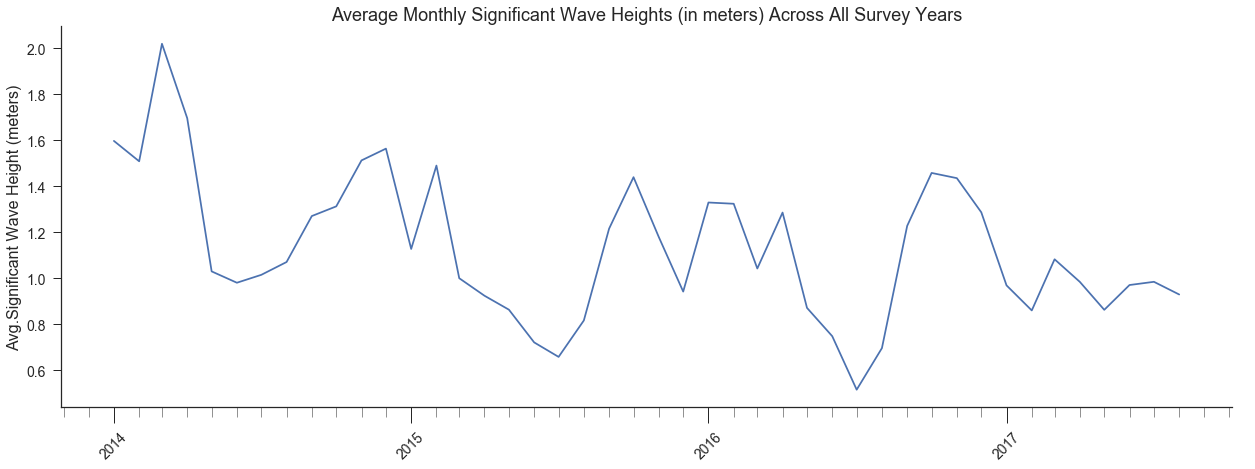

In [14]:
### Plot Monthly Averaged Significant Wave Heights for the OBX Region for the Period 2014 thru 8/2017, to cover the
### Pea Island Beach Monitoring Project...
fig1, ax1 = plt.subplots( figsize=(21,7) )  # create an axis object

pt1=pd.pivot_table(df_all, index=['YearMon'], values=['WVHT'])  #.plot(kind='Line', ax=ax1, figsize=(21,7), legend=False)

ax1.plot( pt1 )
# format the ticks and axes (Note that the pivot table index must be a datetime object):
ax1.xaxis.set_major_formatter( mdates.DateFormatter("%Y") )  # formats tick label as full year YYYY only
ax1.xaxis.set_major_locator( mdates.YearLocator() )          # to set major x ticks to year
ax1.xaxis.set_minor_locator( mdates.MonthLocator() )         # to set minor x ticks to months
sns.set_style("ticks", {"xtick.major.size": 16, "xtick.minor.size": 10,"ytick.major.size": 8})
sns.despine()

plt.xticks(fontsize=14, rotation=45, ha='center')   # ha=horizontal alignment (centers the label relative to tick)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=16)
plt.ylabel('Avg.Significant Wave Height (meters)', fontsize=16)
plt.title('Average Monthly Significant Wave Heights (in meters) Across All Survey Years', fontsize=18)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/SignificantWaveHeights_MonthlyAvg.pdf')

### Significant Wave Heights - Daily Averaged:

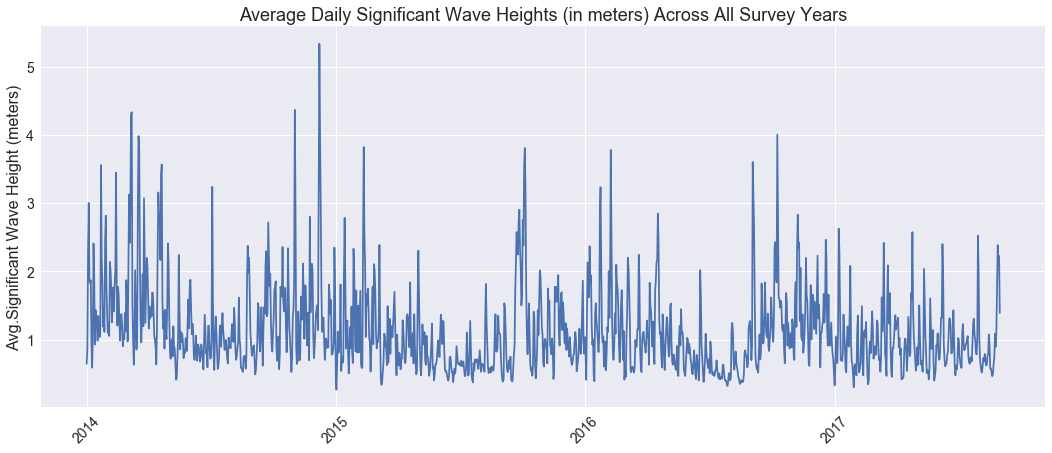

In [12]:
### Plot Daily Averaged Significant Wave Heights for the OBX Region for the Period 2014 thru 8/2017, to cover the
### Pea Island Beach Monitoring Project...
fig2, ax2 = plt.subplots( figsize=(18,7))  # create an axis object

pt2=pd.pivot_table(df_all, index=['YearMonDay'], values=['WVHT'])  #.plot(kind='Line', ax=ax2, figsize=(21,7), legend=False)

ax2.plot( pt2 )
# format the ticks and axes (Note that the pivot table index must be a datetime object):
ax2.xaxis.set_major_formatter( mdates.DateFormatter("%Y") )  #formats tick label as full year YYYY only
ax2.xaxis.set_major_locator( mdates.YearLocator() )          # to set major x ticks to year
ax2.xaxis.set_minor_locator( mdates.MonthLocator() )         # to set minor x ticks to months
sns.set_style("ticks", {"xtick.major.size": 16, "xtick.minor.size": 10,"ytick.major.size": 8})
sns.despine()

plt.xticks(fontsize=14, rotation=45, ha='center')   # ha=horizontal alignment (centers the label relative to tick)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=16)
plt.ylabel('Avg.Significant Wave Height (meters)', fontsize=16)
plt.title('Average Daily Significant Wave Heights (in meters) Across All Survey Years', fontsize=18)
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/SignificantWaveHeights_DailyAvg.pdf')

In [87]:
#df_all['WVHT'].max()
df_all.loc[(df_all['WVHT'] >= 6.0)]

,year,month,day,hour,minute,WDIR,WSPD,GST,WVHT,DPD,...,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,TSTAMP,YearMon,YearMonDay
3119,2014,3,8,0,17,999,99.0,99.0,6.41,11.76,...,68,9999.0,999.0,5.1,999.0,99.0,99.0,2014-03-08 00:17:00,2014-03-01,2014-03-08
3121,2014,3,8,1,17,999,99.0,99.0,6.63,12.50,...,69,9999.0,999.0,5.1,999.0,99.0,99.0,2014-03-08 01:17:00,2014-03-01,2014-03-08
3122,2014,3,8,1,47,999,99.0,99.0,6.04,11.76,...,66,9999.0,999.0,5.0,999.0,99.0,99.0,2014-03-08 01:47:00,2014-03-01,2014-03-08
3127,2014,3,8,4,17,999,99.0,99.0,6.37,11.76,...,54,9999.0,999.0,5.0,999.0,99.0,99.0,2014-03-08 04:17:00,2014-03-01,2014-03-08
8602,2014,7,4,7,47,999,99.0,99.0,6.20,11.76,...,159,9999.0,999.0,25.1,999.0,99.0,99.0,2014-07-04 07:47:00,2014-07-01,2014-07-04
8603,2014,7,4,8,17,999,99.0,99.0,6.01,11.11,...,161,9999.0,999.0,24.7,999.0,99.0,99.0,2014-07-04 08:17:00,2014-07-01,2014-07-04
8604,2014,7,4,8,47,999,99.0,99.0,6.52,10.53,...,161,9999.0,999.0,24.4,999.0,99.0,99.0,2014-07-04 08:47:00,2014-07-01,2014-07-04
8606,2014,7,4,9,47,999,99.0,99.0,6.02,9.88,...,156,9999.0,999.0,24.4,999.0,99.0,99.0,2014-07-04 09:47:00,2014-07-01,2014-07-04
16017,2014,12,8,6,17,999,99.0,99.0,6.15,14.29,...,65,9999.0,999.0,13.3,999.0,99.0,99.0,2014-12-08 06:17:00,2014-12-01,2014-12-08
16023,2014,12,8,9,17,999,99.0,99.0,6.02,12.50,...,45,9999.0,999.0,13.1,999.0,99.0,99.0,2014-12-08 09:17:00,2014-12-01,2014-12-08


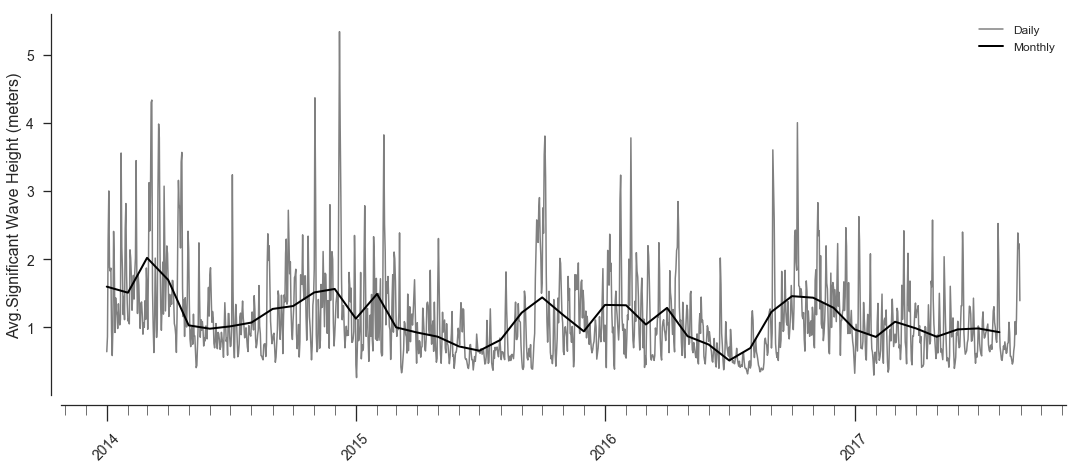

In [23]:
sns.set_context('talk')
### Plot Daily and Monthly Averaged Significant Wave Heights for the OBX Region for the Period 2014 thru 8/2017, 
### to cover the Pea Island Beach Monitoring Project...
fig3, ax3 = plt.subplots( figsize=(18,7))  # create an axis object

ax3.plot( pt2, linestyle='solid', linewidth=1.5, color='gray', label='Daily')
ax3.plot( pt1, linestyle='solid', linewidth=2.0, color='black', label='Monthly' )

# format the ticks and axes (Note that the pivot table index must be a datetime object):
ax3.xaxis.set_major_formatter( mdates.DateFormatter("%Y") )  #formats tick label as full year YYYY only
ax3.xaxis.set_major_locator( mdates.YearLocator() )          # to set major x ticks to year
ax3.xaxis.set_minor_locator( mdates.MonthLocator() )         # to set minor x ticks to months
sns.set_style("ticks", {"xtick.major.size": 16, "xtick.minor.size": 10,"ytick.major.size": 8})
sns.despine(offset=10, trim=False)

plt.xticks(fontsize=14, rotation=45, ha='center')   # ha=horizontal alignment (centers the label relative to tick)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=16)
plt.ylabel('Avg.Significant Wave Height (meters)', fontsize=16)
#plt.title('Average Monthly and Daily Significant Wave Heights (in meters) - All Surveys', fontsize=18)

plt.legend(loc='upper right', fontsize=12)
plt.savefig('/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/HeavyMineralAnalysis/SignificantWaveHeights_MonthDayAvg.pdf')

### /Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis

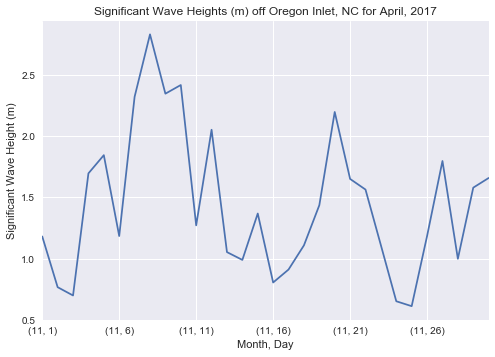

In [27]:
pd.pivot_table(df2016[df2016['month']==11], index=['month','day'], values=['WVHT']).plot(kind='Line', legend=False)
plt.xlabel('Month, Day')
plt.ylabel('Significant Wave Height (m)')
plt.title('Significant Wave Heights (m) off Oregon Inlet, NC for April, 2017')
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/SignificantWaveHts_4_2017.pdf')

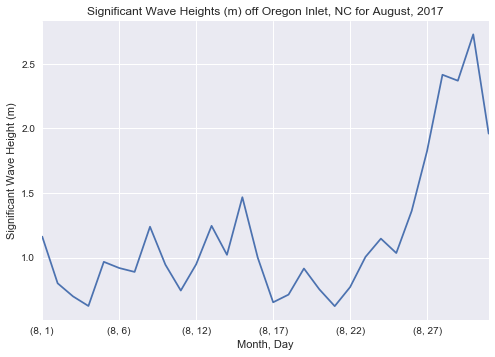

In [9]:
pd.pivot_table(df2017[df2017['month']==8], index=['month','day'], values=['WVHT']).plot(kind='Line', legend=False)
plt.xlabel('Month, Day')
plt.ylabel('Significant Wave Height (m)')
plt.title('Significant Wave Heights (m) off Oregon Inlet, NC for August, 2017')
plt.savefig('/Volumes/Beaker/projects/Pea_Island_Beach_Monitoring/HeavyMineralAnalysis/SignificantWaveHts_8_2017.pdf')

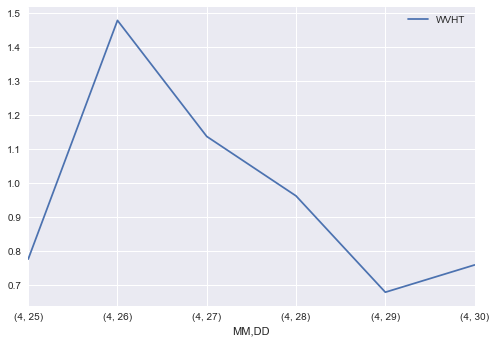

In [23]:
pd.pivot_table(df2015[df2015['month']==4], index=['month','day'], values=['WVHT']).plot(kind='Line')

## Wind

Data from the met station located at the Oregon Inlet Fishing Center and Coast Guard Station on Bodie Island, NC.

In [27]:
fw='orin7h2016.txt'

wcols=['YY','MM','DD','hh','mm','WDIR','WSPD','GST','WVHT','DPD','APD','MWD','PRES','ATMP',
       'WTMP','DEWP','VIS','TIDE']
df2016w=pd.read_fwf(fp+fw, header=1, skiprows=1, delim_whitespace=True, names=wcols)
df2016w

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2016,1,1,0,12,38,5.4,7.0,99.0,99.0,99.0,999,1018.9,13.6,17.3,999.0,99.0,99.0
1,2016,1,1,0,18,40,5.6,7.2,99.0,99.0,99.0,999,1019.0,13.7,17.3,999.0,99.0,99.0
2,2016,1,1,0,24,42,6.1,7.3,99.0,99.0,99.0,999,1018.6,13.7,17.3,999.0,99.0,99.0
3,2016,1,1,0,30,38,5.1,7.2,99.0,99.0,99.0,999,1019.0,13.8,17.3,999.0,99.0,99.0
4,2016,1,1,0,36,40,5.4,7.1,99.0,99.0,99.0,999,1019.1,13.8,17.2,999.0,99.0,99.0
5,2016,1,1,0,42,38,5.6,7.4,99.0,99.0,99.0,999,1019.1,13.9,17.3,999.0,99.0,99.0
6,2016,1,1,0,48,31,5.0,7.8,99.0,99.0,99.0,999,1019.5,13.9,17.3,999.0,99.0,99.0
7,2016,1,1,0,54,30,3.9,6.2,99.0,99.0,99.0,999,1019.9,13.9,17.3,999.0,99.0,99.0
8,2016,1,1,1,0,34,4.4,6.3,99.0,99.0,99.0,999,1019.6,13.9,17.3,999.0,99.0,99.0
9,2016,1,1,1,6,32,4.7,6.3,99.0,99.0,99.0,999,1019.5,13.9,17.3,999.0,99.0,99.0


In [31]:
pd.pivot_table(df2016w, index=['MM'], values=['WDIR','WSPD','GST'] )

,GST,WDIR,WSPD
MM,,,
1,8.563865,223.795322,6.722263
2,12.593431,239.186834,10.762143
3,11.080131,211.859716,9.552197
4,10.930105,196.297930,9.061982
5,21.554027,299.871216,20.335432
6,24.596716,323.249790,23.330480
7,20.103538,307.060699,18.999413
8,12.345523,200.382361,11.177507
9,8.446957,153.155410,6.817477


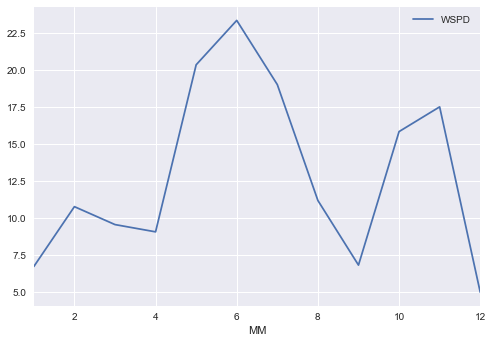

In [32]:
pd.pivot_table(df2016w, index=['MM'], values=['WSPD'] ).plot(kind='Line')

In [28]:
df2016w.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2016,1,1,0,12,38,5.4,7.0,99.0,99.0,99.0,999,1018.9,13.6,17.3,999.0,99.0,99.0
1,2016,1,1,0,18,40,5.6,7.2,99.0,99.0,99.0,999,1019.0,13.7,17.3,999.0,99.0,99.0
2,2016,1,1,0,24,42,6.1,7.3,99.0,99.0,99.0,999,1018.6,13.7,17.3,999.0,99.0,99.0
3,2016,1,1,0,30,38,5.1,7.2,99.0,99.0,99.0,999,1019.0,13.8,17.3,999.0,99.0,99.0
4,2016,1,1,0,36,40,5.4,7.1,99.0,99.0,99.0,999,1019.1,13.8,17.2,999.0,99.0,99.0


In [67]:
### SIDEBAR: test the following to see if it works to convert an existing data column in a pandas dataframe from
### one type to another:

### df["existing var"] = df["existing var"].astype("new type")

# example:
df2017['VIS']=df2017['VIS'].astype(int)
df2017

# Yep. Seems to work.

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2017,4,1,1,18,999,99.0,99.0,2.52,7.69,6.50,144,9999.0,999.0,10.1,999.0,99,99.0
1,2017,4,1,1,48,999,99.0,99.0,2.57,8.33,6.53,144,9999.0,999.0,10.2,999.0,99,99.0
2,2017,4,1,2,18,999,99.0,99.0,2.40,7.69,6.36,149,9999.0,999.0,10.2,999.0,99,99.0
3,2017,4,1,2,48,999,99.0,99.0,2.35,7.69,6.36,155,9999.0,999.0,10.3,999.0,99,99.0
4,2017,4,1,3,18,999,99.0,99.0,2.21,7.69,6.34,147,9999.0,999.0,10.3,999.0,99,99.0
5,2017,4,1,3,48,999,99.0,99.0,2.22,7.69,6.63,148,9999.0,999.0,10.4,999.0,99,99.0
6,2017,4,1,4,18,999,99.0,99.0,2.07,7.69,6.58,154,9999.0,999.0,10.4,999.0,99,99.0
7,2017,4,1,4,48,999,99.0,99.0,1.95,7.69,6.49,152,9999.0,999.0,10.5,999.0,99,99.0
8,2017,4,1,5,18,999,99.0,99.0,2.07,8.33,6.75,142,9999.0,999.0,10.5,999.0,99,99.0
9,2017,4,1,5,48,999,99.0,99.0,2.13,7.69,6.91,149,9999.0,999.0,10.5,999.0,99,99.0


In [ ]:
### ANOTHER SIDEBAR: test the following to see if it will successfully extract a subset from a pandas pivot
### table:

# table.query('Manager == ["Debra Henley"]')

# where: table is the name of an existing pandas pivot table, Manager is an existing column in that pivot table/dataframe 
#    and Debra Henley is an existing name value in the dataframe

### another: table.query('Status == ["pending","won"]')